In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
weather = pd.read_csv('data/Weather.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [9]:
np.version.version

'1.25.0'

# Basic requirements: simple linear regression model

We start by plotting our data. Although the data is spread out, there seems to be an increase in visibility when the temperature increases, so perhaps a linear regression model might be able to capture this relationship.

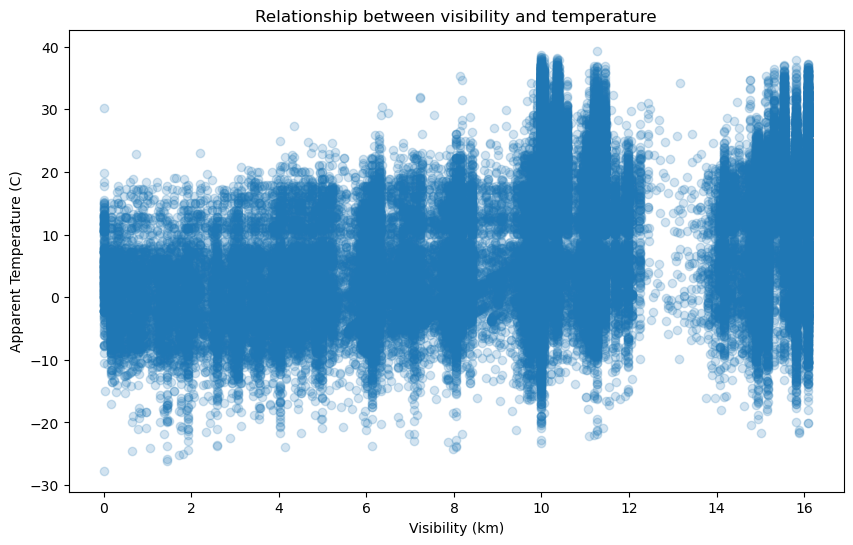

In [10]:
# plotting our data

plt.figure(figsize=(10, 6))

plt.title('Relationship between visibility and temperature')
plt.ylabel('Apparent Temperature (C)')
plt.xlabel('Visibility (km)')

plt.scatter(weather['Visibility (km)'], 
            weather['Apparent Temperature (C)'], 
            alpha=0.2,
            )
plt.show()

In [11]:
# creating our model

from sklearn.linear_model import LinearRegression


model = LinearRegression()

In [13]:
X = weather[['Visibility (km)']]  # important, double brackets are needed here!!
y = weather['Apparent Temperature (C)']

model.fit(X, y)

LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression()

### R-Squared

We can quantify the performance of our model above using the R-squared score (be ready to explain how it works and interpret your result). 

This is the proportion of variance in your dependent variable (y) that can be explpained by the variance in your independent variable (X). In simpler terms: the higher the R-Squared, the better your model captures the relationship. R-Squared typically ranges from 0.0 to 1.0, with higher values associated with stroner models. 

Our result below, 0.145, is quite low, showing low correlation between these two variables. In other words, visibility is not a great predictor for temperature.

In [9]:
model.score(X, y)  

0.14514194530316715

### Equation

The linear equation can be defined as: $y = a + bX$

where:

* $a$ = intercept

* $b$ = coefficient

Interpretation: when $X$ increases by 1 unit, $y$ increases by $b$ units. When $X$ equals to 0, $y$ equals to $a$.

In [10]:
model.coef_  # coeficient of the equation

array([0.97248831])

In [11]:
model.intercept_  # intercept of equation

0.7820660059336966

### Predictions

In [12]:
y_pred = model.predict(X)  # predicting new values of y for each value of X in our original data set
y_pred

array([16.17295777, 16.17295777, 15.32747643, ..., 16.43912782,
       16.43912782, 15.87547359])

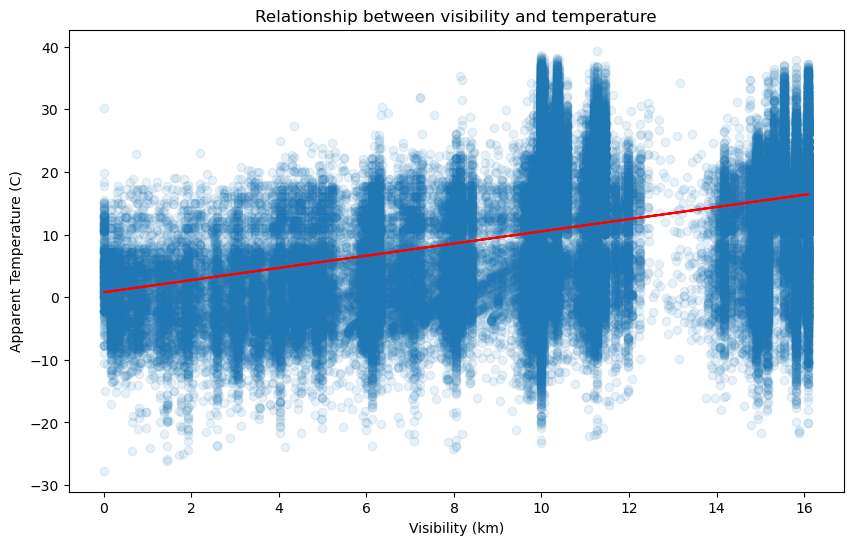

In [13]:
# plotting our original data, together with the predictions; the predictions are plotted as a single line

plt.figure(figsize=(10, 6))

plt.title('Relationship between visibility and temperature')
plt.ylabel('Apparent Temperature (C)')
plt.xlabel('Visibility (km)')

plt.scatter(X, y, alpha=0.1)
plt.plot(X, y_pred, color='r')
plt.show()

# Mid-Level: futher quantification of model performance

### Train/test split + under/overfitting + RMSE

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
X = weather[['Visibility (km)']]  # important, double brackets are needed here!!
y = weather['Apparent Temperature (C)']

Instead of using all of our data to train the model as before, we will split out data into two subsets, one for training and one for testing. This allows us to test our model against data it never seen before, and is a more realistic way evaluating it. This also helps avoid overfitting, which is when the model performs very well on the data it has been trained on, but poorly on new data. Typical train/test splits are 80%/20% or 75%/25%.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [14]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

### Interpret R-squared and root mean squared error (RMSE) 

Train and test scores are very similar so no concerns about underfitting (train score lower than test score) or overfitting (test score lower than train score) of the model.

RMSE is on average how far out are the predictions from our model are from the actual values in the dataset and is in the same units. So if the model predicts a temperature of 20C for a value of X then the actual temperature for that value of X will on average be between 20C + RMSE and 20C - RMSE 

In [15]:
y_pred = model_2.predict(X_test)

train_score = model_2.score(X_train, y_train)
test_score = model_2.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')
print(f'RMSE: {rmse}')

Train Score: 0.1453270521617258
Test Score: 0.1443090099588945
RMSE: 9.859866232381297


A good way of understanding the size of your RMSE is to normalise it against the range of your data (max minus min). This allows you to think of the average error in the predictions in relation to the range of your data. In our case below, this suggests our model misses out the real data points by about 14.7% the range of our data.

In [16]:
nrmse = rmse / (y.max() - y.min())
print(f'Normalised RMSE (NRMSE): {nrmse}')

Normalised RMSE (NRMSE): 0.14702807736133158


### Equation

In [17]:
model_2.coef_  # coeficient of the equation

array([0.97659033])

In [18]:
model_2.intercept_  # intercept of equation

0.7788190212380695

In [19]:
#retrain model on full dataset prior to making predictions

model_2.fit(X, y)

LinearRegression()

Using the model to predict what is the apparent temperature when visbility is 13 km:

In [20]:
X_pred = [[13]]
y_pred = model_2.predict(X_pred)
y_pred

/Users/gilbertoagostinho/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.42441405])

Using the model to predict what is the apparent temperature when visbility is 5, 10, and 15 km:

In [21]:
X_pred = [[5], [10], [15]]
y_pred = model_2.predict(X_pred)
y_pred

/Users/gilbertoagostinho/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 5.64450756, 10.50694912, 15.36939068])

That is:

* for 5 km of visibility, the predicted temperature is 5.6 degrees Celsius
* for 10 km of visibility, the predicted temperature is 10.5 degrees Celsius
* for 15 km of visibility, the predicted temperature is 15.3 degrees Celsius

# Multiple linear regression 

In our previous models, we used a single variable (visibility) to predict our target (temperature). This time, we will use multiple variables as predictors, which may improve the performance of our model.

### Pairplot and correlation matrix for feature selection 

In [22]:
import numpy as np
import seaborn as sns

The function below creates scatter plot of every single variable in our data frame against every other. This allows us to visually inspect the correlation between them.

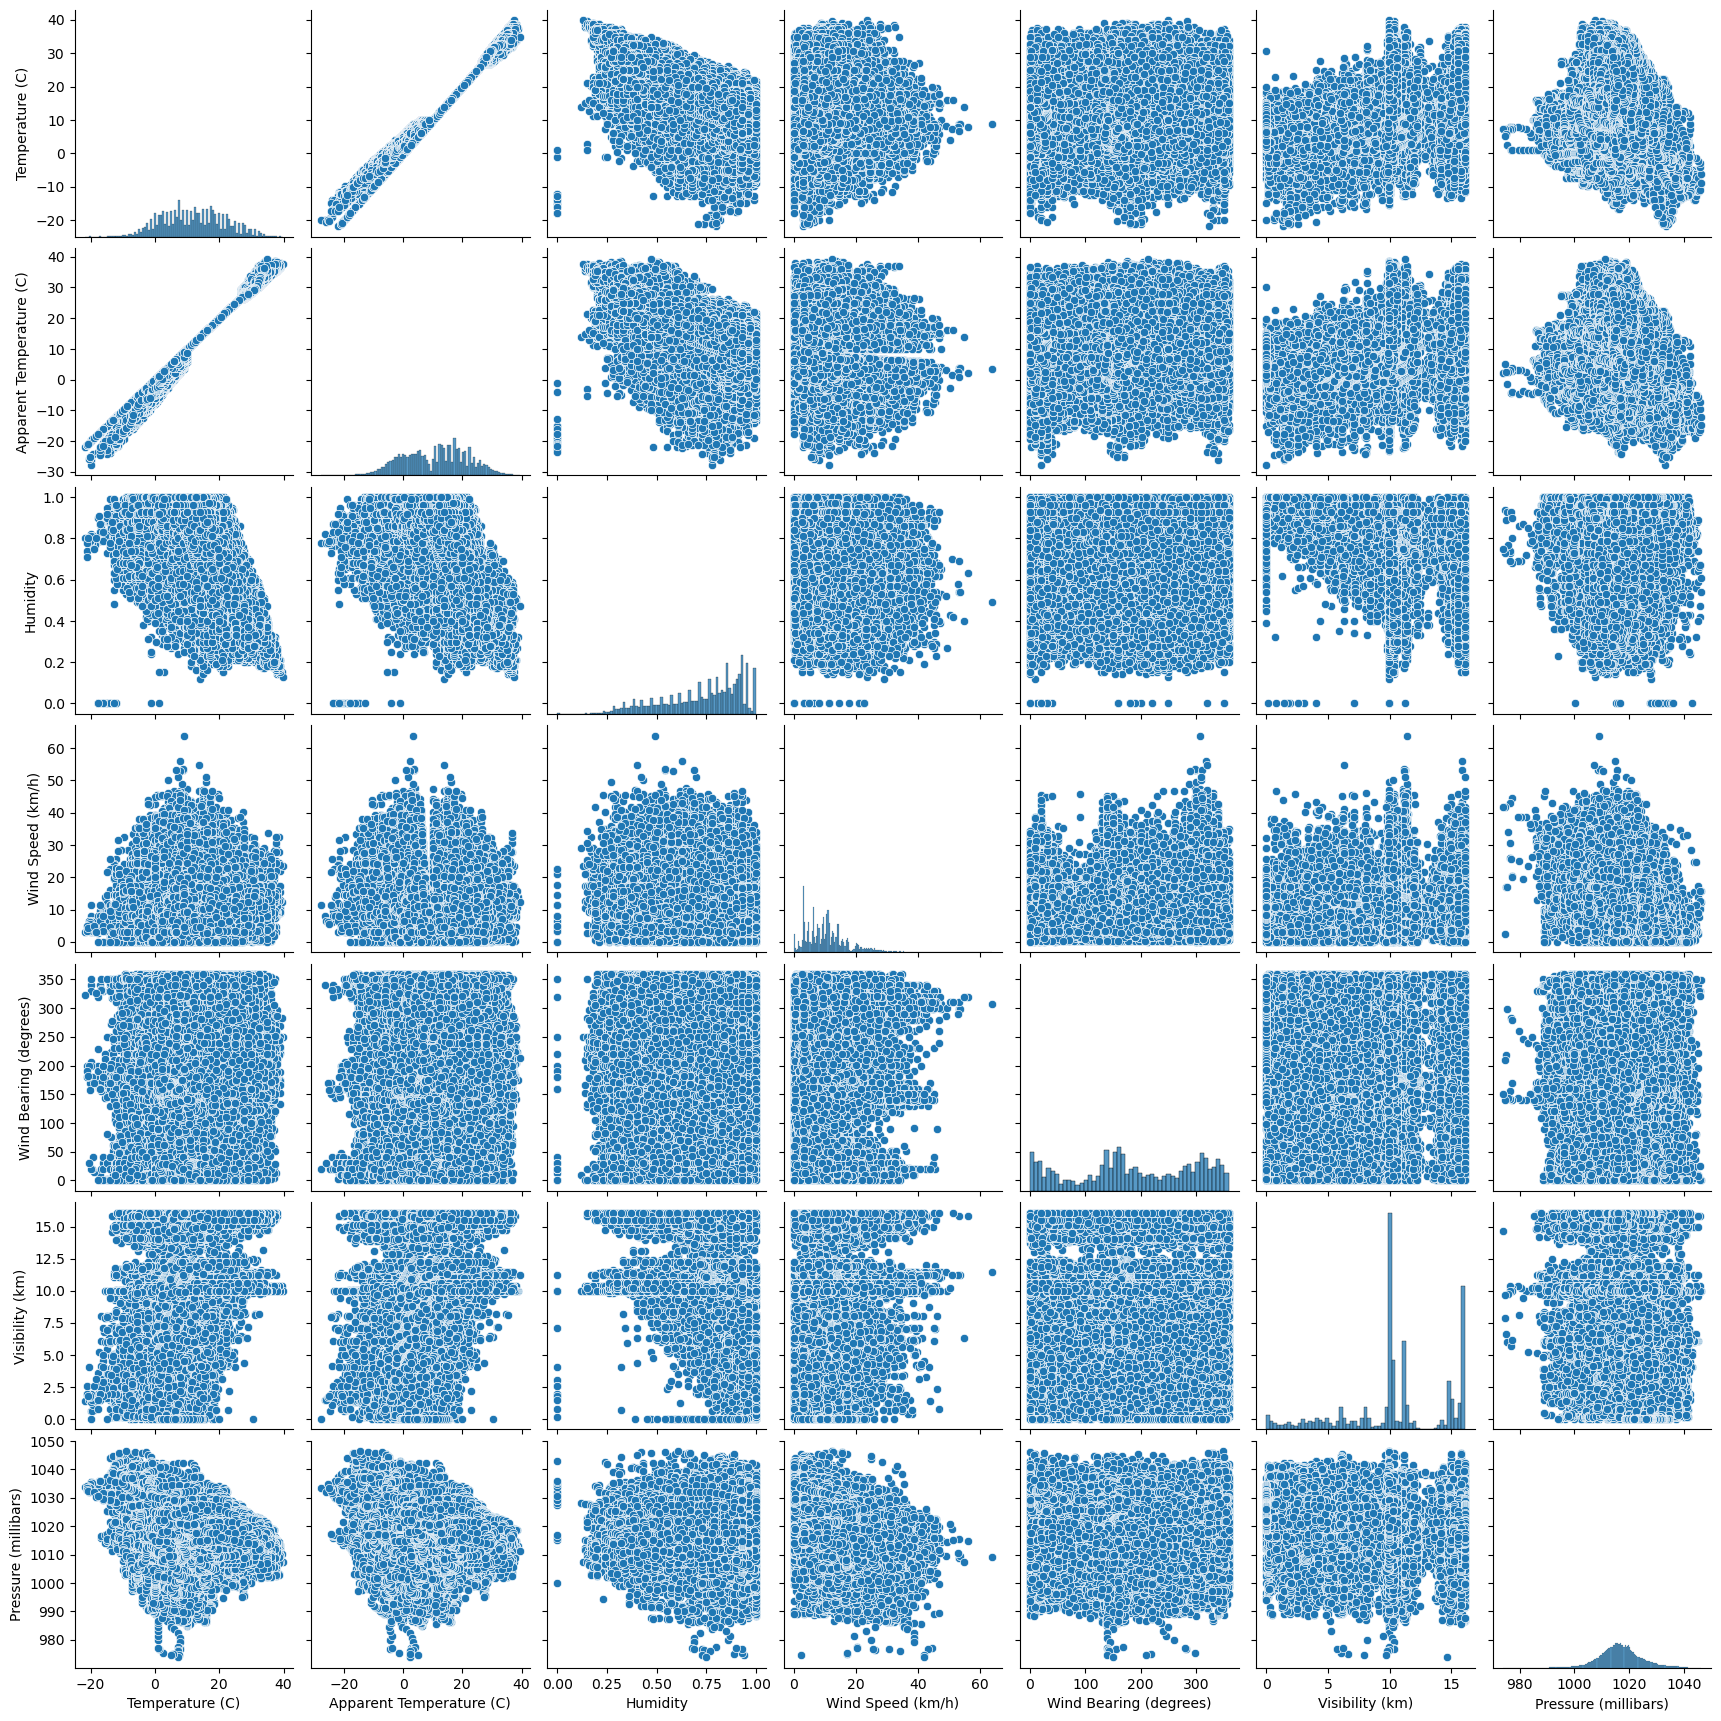

In [23]:
sns.pairplot(weather.select_dtypes(include=[np.number]))
plt.show()

A great option is to create a correlation matrix.

# TODO: briefly explain what it is, how to read it

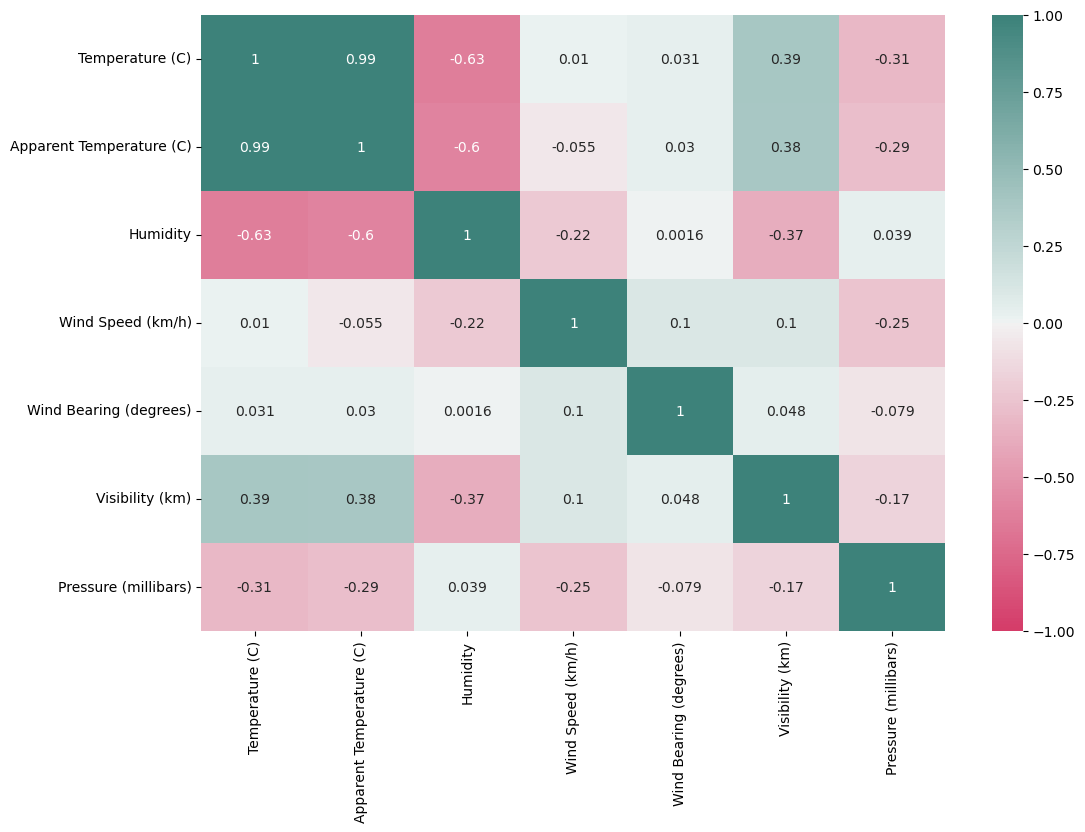

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(weather.corr(numeric_only=True), # default .corr() produces the Pearsons Correlation coefficient which is the strength of the linear relationship between 2 variables
            annot=True,  # adds the correlation value to each cell
            cmap=sns.diverging_palette(0, 180, n=200),  # diverging palette with strong green for +1, strong pink for -1, and neutral grey for 0
            vmin=-1,  # associates the minimum pallete colour to a correlation of -1.0 (isntead of min value in data).
            vmax=1,  # associates the maximum pallete colour to a correlation of 1.0 (instead of max value in data)
            ) 

plt.show()

### Discussion on choice of variables using the matrix above

You should chose variables that strongly correlate with the target(dependent) variable, that could be values close to 1 or close to minus 1. 

* Despite the strong correlation, we can't use temperature to predict apparent temperature as the apprent temperature is directly dependent on the temperature (apparent temperature is calculated using the temperature). 
* Generally, you should also avoid selecting independent variables that are strongly correlated with each other as this will introduce multicollinearity into your model which goes against a key assumption of linear regression.

In this case I will choose Visibility, Humidity and Pressure as the independent variables for my multiple linear regression model.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
X = weather[['Visibility (km)', 'Humidity', 'Pressure (millibars)']]  # important, double brackets are needed here!! You can have multiple independent variables
y = weather['Apparent Temperature (C)']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [28]:
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model_3.predict(X_test)

train_score = model_3.score(X_train, y_train)
test_score = model_3.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
nrmse = rmse / (y.max() - y.min())

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')
print(f'RMSE: {rmse}')
print(f'Normalised RMSE (NRMSE): {nrmse}')

Train Score: 0.4520801925596377
Test Score: 0.44617110819809813
RMSE: 7.9206918246457185
Normalised RMSE (NRMSE): 0.1181115506947419


Train score slightly higher than test score but ulitmately very similar so no concerns about under or overfiting

Make sure you:

* interpret R-squared
* interpret RMSE and contextualise against typical apparent temperature value (mean or median)

Notice how we have a significantly higher R-squared than the simple linear regression model from before, so more of the variance in y is explained by the variance in these independent variables. It has a lower RMSE thus more accurate predictions.

In [30]:
print(f'The intercept is: {model_3.intercept_}')

The intercept is: 373.725891392893


In [31]:
effect_df = pd.DataFrame(model3.coef_,
                         index=X_train.columns,
                         columns=['Coefficient'])
effect_df = effect_df.sort_values(by='Coefficient')

display(effect_df)

NameError: name 'model3' is not defined

### Equation

The linear equation can be defined as: $y = a + m_1X_1 + m_2X_2 + m_3X_3$

where:

* $a$ = intercept
* $m_1$ = coefficient related to $X_1$
* $m_2$ = coefficient related to $X_2$
* $m_3$ = coefficient related to $X_3$

Interpretation: when only $X_1$ increases by 1 unit, $y$ changes by $m_1$ units. When only $X_2$ increases by 1 unit, $y$ changes by $m_2$ units. And when only $X_3$ increases by 1 unit, $y$ changes by $m_3$ units.

When $X_1$, $X_2$, and $X_3$ equals to 0, $y$ equals to $a$.

In the case of our model, the coefficient for Humidity is a much larger magnitude that the other 2 coefficients as such is the most impactful independent varible in this model. 
# TODO: This last sentence above is not correct I think, it depends on the scale of the data

### Predictions

Using the model, we can now make predictions. For instance, let's predict what is the apparent temperature when:

* visbility is 13Km
* humidity is 70%
* and pressure is 1010 millibar

In [ ]:
X_pred = [[13, 0.7, 1010]] # you must provide a value for ever indepedent variable used to fit the model
y_pred = model_3.predict(X_pred)  
y_pred

In [ ]:
# requires data to be numeric so use np.asarray(X)

# Null: two datasets are not significantly corrrelated
# Alternate: they are

# X = sm.add_constant(X)
# model = sm.OLS(y, X, hasconst=True)
# res=model.fit()
# res.summary()


# TODO: I'd remove this to be honest